# 项目：电影数据集调查分析

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介


本数据集记录了1万多条从1960年至2015年左右的电影数据。根据数据集提出以下问题：
- 每年受欢迎的电影类别是什么？
- 分析高票房收入电影的特点
- 统计哪个导演的高票房电影数目最多

<a id='wrangling'></a>
## 数据整理

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
sns.set_style('darkgrid')
#首先读取数据
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# 加载数据并打印几行。进行几项操作，检查数据
# 类型，以及是否有缺失数据或错误数据。
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**通过数据类别查看，需要研究的问题中并不会涉及‘imdb_id’，‘homepage’、‘tagline’、‘keywords’、‘production_companies’，分析高票房电影和受欢迎电影数据时可以去掉这几列的内容，另’cast‘、‘director’、‘genres’列缺失内容相对于总体数据较少，因此可以直接丢弃缺失的内容。而’budget‘和’revenue‘并不会使用，对于收入和预算以’budget_adj‘和’revenue_adj‘为准，故同样去掉。**

In [4]:
#丢弃不用的列
df = df.drop(columns=['imdb_id','homepage','tagline','keywords','production_companies','budget','revenue'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
overview          10862 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


In [6]:
#丢弃缺失值的行
df.dropna(how='any',inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 10865
Data columns (total 14 columns):
id                10730 non-null int64
popularity        10730 non-null float64
original_title    10730 non-null object
cast              10730 non-null object
director          10730 non-null object
overview          10730 non-null object
runtime           10730 non-null int64
genres            10730 non-null object
release_date      10730 non-null object
vote_count        10730 non-null int64
vote_average      10730 non-null float64
release_year      10730 non-null int64
budget_adj        10730 non-null float64
revenue_adj       10730 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


In [8]:
df.describe()#查看是否存在异常数据

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10730.000000,10730.000000,10730.000000,10730.000000,10730.000000,10730.000000,1.073000e+04,1.073000e+04
mean,65198.307549,0.652688,102.477633,219.840913,5.964809,2001.258621,1.776975e+07,5.201117e+07
std,91474.795520,1.004834,30.479401,578.836513,0.930264,12.820336,3.446726e+07,1.454310e+08
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10547.250000,0.210766,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20317.500000,0.387247,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73938.500000,0.721158,112.000000,148.000000,6.600000,2011.000000,2.112691e+07,3.470565e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
df.duplicated().value_counts()#查看是否存在重复数据

False    10729
True         1
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)#去重

In [11]:
df.duplicated().value_counts()#检验

False    10729
dtype: int64

<a id='eda'></a>
## 探索性数据分析

### 每年受欢迎的电影类别有哪些？

In [12]:
# 按照|对类型进行分割
split_genres = df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres')

In [13]:
# 组成新的数据集
df_genres = df.drop('genres', axis=1).join(split_genres)

In [14]:
df_genres

,id,popularity,original_title,cast,director,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Adventure
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Science Fiction
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Thriller
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Science Fiction


In [15]:
# 每个类型出现的次数
df_genres.groupby(['genres']).size()

genres
Action             2376
Adventure          1465
Animation           664
Comedy             3774
Crime              1353
Documentary         470
Drama              4746
Family             1214
Fantasy             908
Foreign             184
History             330
Horror             1636
Music               398
Mystery             808
Romance            1707
Science Fiction    1221
TV Movie            162
Thriller           2902
War                 268
Western             164
dtype: int64

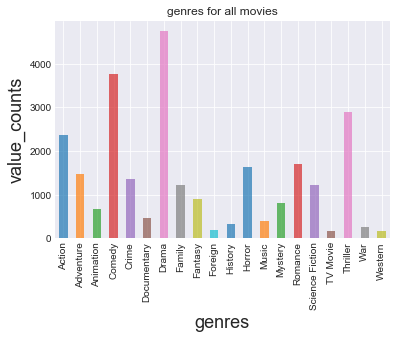

In [16]:
df_genres.groupby(['genres']).size().plot(kind='bar',alpha=.7)#统计所有电影类别的受欢迎程度
plt.title('genres for all movies')
plt.xlabel('genres',fontsize=18)
plt.ylabel('value_counts',fontsize=18)
plt.show()

**统计所有电影类别次数表明，`Drama`类型电影出现最多,其次是`Comedy`类型**

In [17]:
df_genres.query('release_year==2015')['genres'].describe()

count      1372
unique       19
top       Drama
freq        260
Name: genres, dtype: object

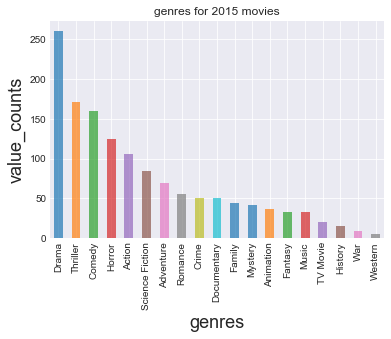

In [18]:
df_genres.query('release_year==2015')['genres'].value_counts().plot(kind='bar',alpha=.7)
plt.title('genres for 2015 movies')
plt.xlabel('genres',fontsize=18)
plt.ylabel('value_counts',fontsize=18)
plt.show()

**以2015年电影为例观察，`Drama`依然是出现次数组多的电影类别.**

In [19]:
# 每个类型和年份对应的平均popularity
grouped_pop = df_genres.groupby(['release_year', 'genres'], as_index = False)['popularity'].mean()

In [20]:
#举例看2015年电影类别的受欢迎程度,不知如何处理每年最受欢迎的电影类别
grouped_pop.query('release_year==2015')

,release_year,genres,popularity
1026,2015,Action,2.272209
1027,2015,Adventure,3.283786
1028,2015,Animation,1.195554
1029,2015,Comedy,0.948836
1030,2015,Crime,1.722032
1031,2015,Documentary,0.196621
1032,2015,Drama,0.937877
1033,2015,Family,1.369038
1034,2015,Fantasy,1.740228
1035,2015,History,1.007905


### 票房高的电影有哪些特点？

In [21]:
#为票房高电影单独生成一个DataFrame
df_high_revenue = df_genres[['popularity','revenue_adj','original_title','release_year','vote_average','genres','director']]
df_high_revenue = df_high_revenue.query('revenue_adj > 5.0e+08')#统计5亿以上票房收入
df_high_revenue.sort_values(by='revenue_adj',ascending=False)#排序

,popularity,revenue_adj,original_title,release_year,vote_average,genres,director
1386,9.432768,2.827124e+09,Avatar,2009,7.1,Action,James Cameron
1386,9.432768,2.827124e+09,Avatar,2009,7.1,Adventure,James Cameron
1386,9.432768,2.827124e+09,Avatar,2009,7.1,Fantasy,James Cameron
1386,9.432768,2.827124e+09,Avatar,2009,7.1,Science Fiction,James Cameron
1329,12.037933,2.789712e+09,Star Wars,1977,7.9,Adventure,George Lucas
1329,12.037933,2.789712e+09,Star Wars,1977,7.9,Science Fiction,George Lucas
1329,12.037933,2.789712e+09,Star Wars,1977,7.9,Action,George Lucas
5231,4.355219,2.506406e+09,Titanic,1997,7.3,Romance,James Cameron
5231,4.355219,2.506406e+09,Titanic,1997,7.3,Drama,James Cameron
5231,4.355219,2.506406e+09,Titanic,1997,7.3,Thriller,James Cameron


In [22]:
df_high_revenue['vote_average'].mean()#结论1：票房高的电影的平均分数要高于所有电影的平均水平

6.789026063100126

In [23]:
df['vote_average'].mean()

5.964898872215509

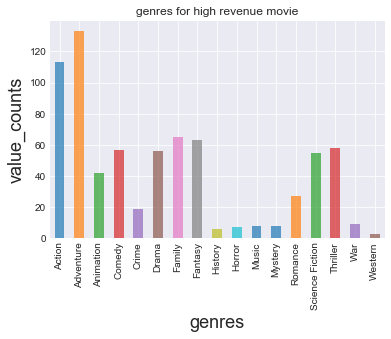

In [24]:
#柱形图统计高票房电影的类别分布
df_high_revenue.groupby(['genres']).size().plot(kind='bar',alpha=.7)
plt.title('genres for high revenue movie')
plt.xlabel('genres',fontsize=18)
plt.ylabel('value_counts',fontsize=18)
plt.show()

**通过柱形图观察：电影如果是`Action`和`Adventure`类别可能会收获高票房**

Text(0,0.5,'revenue')

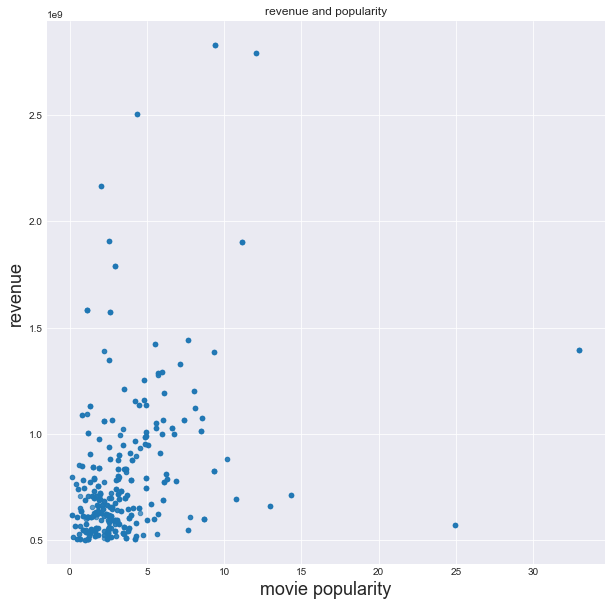

In [25]:
#通过散点图观察高票房电影和受欢迎程度之间的关系
df_high_revenue.plot.scatter(x='popularity', y='revenue_adj',figsize=(10,10),alpha=.7)
plt.title('revenue and popularity')
plt.xlabel('movie popularity',fontsize=18)
plt.ylabel('revenue',fontsize=18)

**通过散点图观察：高票房电影受欢迎的程度一般集中在0-10%的区间内**

In [26]:
df_high_revenue.drop(columns='genres',inplace=True)

In [27]:
df_high_revenue.drop_duplicates(inplace=True)

In [28]:
df_high_revenue['release_year'].value_counts().mean()#统计每年高票房电影平均数目

4.30188679245283

Text(0,0.5,'Number')

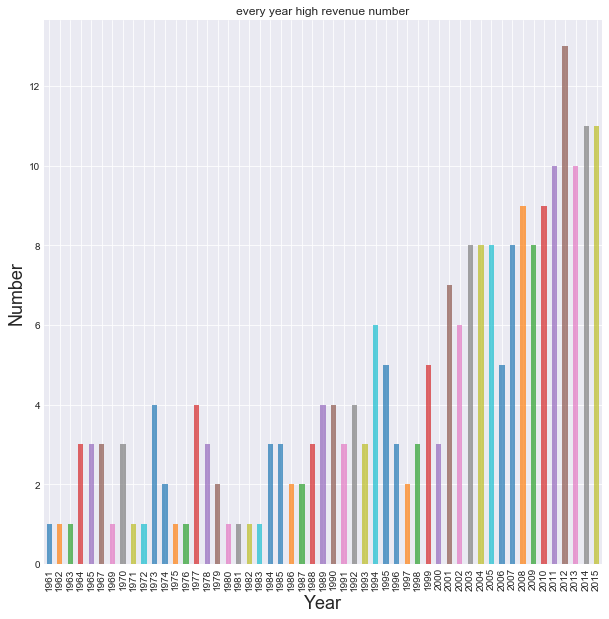

In [29]:
#柱形图统计每年高票房电影的数目
df_high_revenue.groupby('release_year').size().plot(kind='bar',legend=False,figsize=(10,10),alpha=.7)
plt.title('every year high revenue number')
plt.xlabel('Year',fontsize=18)
plt.ylabel('Number',fontsize=18)

**通过柱形图观察：从2000年以后，每年的高票房电影的数目超过了平均值4.3部，成上涨趋势，2012年更是达到了12部以上。**

In [30]:
split_director = df_high_revenue['director'].str.split('|',expand=True).stack().reset_index(level=1,drop=True).rename('director')

In [31]:
df_director = df_high_revenue.drop(columns='director').join(split_director)

In [32]:
df_director.groupby('director').size().sort_values(ascending=False)

director
Steven Spielberg      10
Peter Jackson          7
Chris Columbus         5
Robert Zemeckis        5
George Lucas           5
Michael Bay            5
Christopher Nolan      4
Lee Unkrich            4
David Yates            4
Francis Lawrence       4
James Cameron          4
Roland Emmerich        4
Brad Bird              3
Lana Wachowski         3
Pete Docter            3
Pierre Coffin          3
Eric Darnell           3
Lilly Wachowski        3
Lewis Gilbert          3
Gore Verbinski         3
John Lasseter          3
Sam Raimi              3
Barry Sonnenfeld       3
Guy Hamilton           3
Andrew Adamson         3
Tom McGrath            3
Tim Burton             3
Sam Mendes             2
Conrad Vernon          2
Jon Favreau            2
                      ..
Jan Pinkava            1
Jay Roach              1
Jeannot Szwarc         1
Jennifer Lee           1
Jennifer Yuh           1
Jerry Zucker           1
Joe Russo              1
John Badham            1
John Guillermin 

<a id='conclusions'></a>
## 结论

- 所有电影中出现最多的电影类别是`Drama`，以2015年为例，一共1372部电影中，`Drama`类别的电影出现了260部，最受欢迎的电影类别反而是
`Adventure`.
- 票房高的电影的平均分数要高于所有电影的平均水平
- 电影如果是Action和Adventure类别可能会收获高票房
- 高票房电影受欢迎的程度一般集中在0-10%的区间内
- 从2000年以后，每年的高票房电影的数目超过了平均值4.3部，成上涨趋势，2012年更是达到了12部以上。
- Steven Spielberg导演的电影一共有10部超过了5亿票房，是高票房电影数目最多的导演，请他执导电影的票房收入高的几率很显著增加。

## 局限性

- 在数据清洗过程中，`cast`、`director`、`genres`列缺失的内容直接丢弃，对统计的结果可能会比真实情况要高，不过丢失数据对于统计数据量来说，相对数目很小，姑且忽略不计。
- 对于电影票房收入还可能和天气因素，人们的观影年龄会有关系。
- 报告中仅使用了Exploratory Data Analysis，所以至多只能得出相关关系，而不能得出因果关系。